##  Patterns generated by subdividing a triangle recursively by its incircle<br>Gif file created by MoviePy from Plotly figures saved as png images 

The aim of this notebook is twofold: first to generate interesting patterns through a subdivision algorithm, and second,
    to show how from a sequence of images we can 
    create a gif file, with [MoviePy](https://github.com/Zulko/moviepy).

We are starting with an equilateral triangle of incircle, I, (the point of intersection of the inner bisectors). The point I, the triangle vertices, and the intersection of bisectors to the opposite sides define 6 triangles in the original one, colored like in the following image:

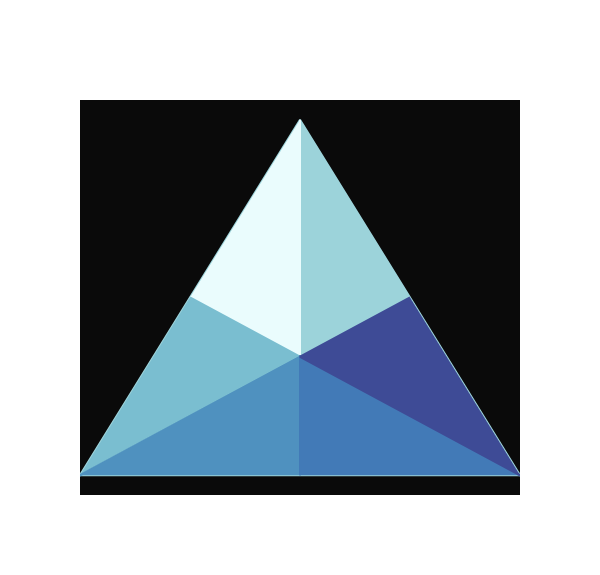

In [1]:
from  IPython.display import Image
Image(filename='image/i1.png')

Subdividing recursively each child triangle and coloring the corresponding 6 subtriangles following the same rule,
we get at the $n^{th}$ step $6^n$ smaller triangles that form   nice patterns. We are stopping this procedure after getting
$6^4=1296$ triangles.
The Plotly figure generated in  each step of the recursive procedure are saved as png images:

In [2]:
import numpy as np
from numpy import sqrt
import copy
import plotly.graph_objs as go
import plotly.io as pio

In [3]:
def sides_tri(T):
    # T - array of shape (3, 2) containing on rows the cartesian coordinates of a  triangle vertices
    # returns the list of side lengths for the triangle T 
    return [np.linalg.norm(T[(k+1)%3]-T[(k+2)%3])  for k in range(3)]


def incircle(T):
    # T - array of shape (3,2)
    # calculate the coordinates of the  incircle point, I
   
    # I = (aA+bB+cC)/(a+b+c) - convex combination of the triangle vertices A B, C, represented by T[0], T[1], T[2]
    a, b, c =sides_tri(T) 
    return T.transpose().dot(sides_tri(T))/(a+b+c)

# Function that returns the intersection of the bisector from T[k] to the opposite side
def inters_bis_opposite(T, k):
    # A'=(bB+cC)/(b+c)  A'= intersection(bis from A with BC)
    if k not in [0, 1, 2]:
        raise ValueError(f'k={k} must be 0, 1 or  2')
    s = sides_tri(T)
    s[k] = 0 
    return T.transpose().dot(s)/sum(s)

In [4]:
def define_save_fig(prev_it, color, layout):
    # prev_it - list of the triangles resulted in the  preivous step of the subdivision algo
    # color - list of 6 color codes
    # layout - dict that defines the  Plotly layout, common to all figures generated here
    # returns the Plotly figure corresponding to the previous subdivision step and the list of triangles
    # resulted in the catual step
    
    # Inner function that generates the list of 6 subtriangles resulted from an incircle subdivision
    # and the corresponding Plotly traces consisting in filled triangles with the assigned color:

    def six_subdiv(T, color):
    # T array of shape (3, 2) containing the cartesian coordinates of  triangle vertices
    # color a list of 6 color codes
        I = incircle(T)
        op = [inters_bis_opposite(T,k) for k in range(3)]
    
        six_tri = []
        for k in range(3):  # the subdivision triangles are ordered and colored
            six_tri.extend([np.array([T[k], I, op[(k+1)%3]]), 
                            np.array([T[k], I, op[(k+2)%3]])])
     
        for k, s in enumerate(six_tri):
            fig.add_scatter(x=s[:, 0], 
                            y=s[:,1],
                            mode= 'lines',                             
                            fill='toself',
                            showlegend=False,
                            fillcolor=color[k],
                            line_color=color[k])               
        return six_tri 
    #  END of inner function  
    
    new_it = []
    for tri in prev_it:
        new_it.extend(six_subdiv(tri, color))
    fig.update_layout(**layout)
    return fig, new_it                  

Define the basic equilateral  triangle on which acts the subdivision algorithm, and 6 colors for its children generated by subdivision:

In [5]:
T = np.array([[0,sqrt(3)], [-1, 0], [1,0] ])

color= ['#9cd3da', '#eafcfd', '#7abed0', '#4f91bf', '#427ab7', '#3e4b96']

#Plot the equilateral triangle 
fig = go.Figure(go.Scatter(x=[T[k%3,0]  for k in range(4)], 
                           y=[T[k%3,1]  for k in range(4)], 
                           mode='lines', 
                           fill='toself', 
                           showlegend=False,
                           fillcolor=color[0], 
                           line_color=color[0]))
# the layout dict
my_layout = dict(width=600, height=575, 
              xaxis_visible=False, 
              yaxis_visible=False, 
              template=None,
              plot_bgcolor='rgb(10,10,10)')
              
fig.update_layout(**my_layout)
pio.write_image(fig,'image/i0.png')
#fig.show()

Loop over the 5 steps of the subdivision, fig generation and  image saving:

In [6]:
prev_it = [T]
for k in range(1, 6):
    fig, new_it = define_save_fig(prev_it, color, my_layout)
    prev_it = copy.deepcopy(new_it)
    pio.write_image(fig, f'image/i{k}.png')
    print(f'Image #{k} done!')

Image #1 done!
Image #2 done!
Image #3 done!
Image #4 done!
Image #5 done!


### Create a gif file from the saved images

In [7]:
from moviepy.editor import *
import os

clips = []
for file in os.listdir("image/"):
    if file.endswith(".png"):
        clips.append(ImageClip("image/"+ file).set_duration(1))

all_clips = concatenate_videoclips( clips, method='compose')     
all_clips.write_gif("image/incircle_subdiv.gif", fps=1)

MoviePy - Building file image/incircle_subdiv.gif with imageio.


Display the gif in the notebook:

In [8]:
%%html 
<img src="image/incircle_subdiv.gif">